## Prepare python environment


In [ ]:
# Installs required packages
!apt install libgraphviz-dev
!pip install pomegranate matplotlib pygraphviz

# Press "Restart Runtime" after running this cell, before going to the rest of the code.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2.24.32-1ubuntu1 [14.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail-common amd64 2.24.32

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
random_state=5 # use this to control randomness across runs e.g., dataset partitioning

## Preparing the dataset (2 points)

We will use diabetes dataset from UCI machine learning repository. Detail of this data can be found [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The objective of the dataset is to  predict whether or not a female patient has diabetes based on certain diagnostic measurements included in the dataset.

The dataset consists of several medical predictor (features) variables and one target variable indicating if the person has diabetes. Predictor variables include the number of pregnancies the patient has had,  glucose level, blood pressure, skin, insulin, bmi, pedigree and age.

### Loading the dataset

In [ ]:
# These are the names of column in the dataset. It includes all features of the data and the label.
col_names = ['pregnancies', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Download and load the dataset
import os
if not os.path.exists('diabetes.csv'): 
    !wget https://raw.githubusercontent.com/JHA-Lab/ece364/main/dataset/diabetes.csv 
diabetes_data = pd.read_csv("diabetes.csv", header=1, names=col_names)

FEATURE_NAMES=diabetes_data.drop('label',axis=1).columns
# Display the first five instances in the dataset
diabetes_data.head(5)

--2021-10-14 19:14:48--  https://raw.githubusercontent.com/JHA-Lab/ece364/main/dataset/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24641 (24K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  24.06K  --.-KB/s    in 0s      

2021-10-14 19:14:48 (124 MB/s) - ‘diabetes.csv’ saved [24641/24641]



,pregnancies,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


#### Use `describe` function to display some statistics of the data. See [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) details about this function.

In [ ]:
# Display some statistics of the data
diabetes_data.describe()

,pregnancies,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  767 non-null    int64  
 1   glucose      767 non-null    int64  
 2   bp           767 non-null    int64  
 3   skin         767 non-null    int64  
 4   insulin      767 non-null    int64  
 5   bmi          767 non-null    float64
 6   pedigree     767 non-null    float64
 7   age          767 non-null    int64  
 8   label        767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Extract target and descriptive features (1 point)


In [ ]:
#split dataset into features and target variable
X = diabetes_data.drop('label', axis=1) # Features
y = diabetes_data['label'] # Target variable

In [ ]:
# Convert data to numpy array
X = X.to_numpy()
y = y.to_numpy()

### Create training and test datasets (1 point)

Split the data into training and test sets using `train_test_split`.  See [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for details. To get consistent result while splitting, set `random_state` to the value defined earlier. We use 80% of the data for training and 20% of the data for testing. 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=random_state) # 80% training and 20% validation

## Training probability-based classifiers (18 points)


### Exercise 1: Learning a Naive Bayes Model (9 points)

#### We will use the `pomegranate` library to train a Naive Bayes Model. Review ch.6 and see [here](https://pomegranate.readthedocs.io/en/latest/NaiveBayes.html) for more details. 

In [ ]:
from pomegranate.distributions import NormalDistribution, ExponentialDistribution, DiscreteDistribution 
from pomegranate.NaiveBayes import NaiveBayes
from pomegranate.BayesClassifier import BayesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
import math

np.random.seed(random_state)

#### Exercise 1a: Fit naive bayes model using a single distribution type (2 points)

#### Train one naive bayes model using a normal distribution per feature. Train another naive bayes model using an exponential distribution per feature. Hint: use NormalDistribution or ExponentialDistribution and NaiveBayes.from_samples() to fit the model to the data.

#### Report the training and test set accuracies for each model. Hint: use accuracy_score()


In [ ]:
for distribution_obj in [NormalDistribution, ExponentialDistribution]:
    print(distribution_obj)
    pom_model=NaiveBayes.from_samples(distribution_obj,X_train,y_train)
    print("training acc: %.2f" %accuracy_score(y_train,pom_model.predict(X_train)))
    print("test acc %.2f" %accuracy_score(y_test,pom_model.predict(X_test)))


<class 'pomegranate.distributions.NormalDistribution.NormalDistribution'>
training acc: 0.77
test acc 0.76
<class 'pomegranate.distributions.ExponentialDistribution.ExponentialDistribution'>
training acc: 0.69
test acc 0.69


#### Exercise 1b: Fit a naive bayes model using different feature distributions (3 points)

#### Visualize the feature distributions (done for you below) to determine which distribution ( normal or exponential) better models a specific feature. 

#### Train a Naive Bayes classifier using this set of feature-specific distributions. Hint: use NormalDistribution or ExponentialDistribution and NaiveBayes.from_samples() to fit the model to the data.

#### Report the training and test set accuracies for the model. Hint: use accuracy_score()

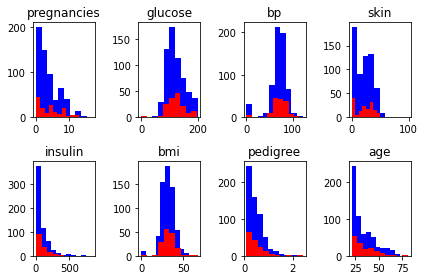

In [ ]:
# visualization code

num_cols=4
num_rows=int(len(FEATURE_NAMES)/num_cols) if len(FEATURE_NAMES)%num_cols == 0 else int(math.ceil(len(FEATURE_NAMES)/num_cols))
fig,ax=plt.subplots(num_rows,num_cols)

for ft_index in np.arange(X_train.shape[1]):
    ax[ft_index//num_cols,ft_index%num_cols].hist(X_train[:,ft_index], color='blue')
    ax[ft_index//num_cols,ft_index%num_cols].hist(X_test[:,ft_index], color='red')
    ax[ft_index//num_cols,ft_index%num_cols].set_title(FEATURE_NAMES[ft_index])
    
fig.tight_layout()

In [ ]:

distribution_obj=[ExponentialDistribution, NormalDistribution, NormalDistribution, ExponentialDistribution,
                    ExponentialDistribution, NormalDistribution, ExponentialDistribution, ExponentialDistribution]
pom_model=NaiveBayes.from_samples(distribution_obj,X_train,y_train)
print("training acc: %.2f" %accuracy_score(y_train,pom_model.predict(X_train)))
print("test acc %.2f" %accuracy_score(y_test,pom_model.predict(X_test)))

training acc: 0.78
test acc 0.75


#### Comment on any performance difference between this model and the models trained in Ex. 1a. (1 point)

 A model fit using a distribution tailored per feature has slightly higher training accuracy than the models from Ex. 1a, given that the features appear to follow different distributions (see the blue bars of histogram plot above). However, the test performance slightly decreases, most likely due to overfitting. The test features (see the red bars of the histogram plot above) follow similar distributions as observed on the training set but differ somewhat with respect to parameters e.g., rate for the exponential distributions.   
 
Note this can be somewhat subjective so accept any reasonable answer.

#### Exercise 1c: Fit a naive bayes model on categorical features (2 points)

#### Besides fitting a naive bayes model on the continuous features, one can fit a naive bayes model on categorical features derived from binning the continuous features, and then compute a probability mass function for each categorical feature.

#### Bin the features by varying the strategy among {equal-width binning, equal-frequency binning}. For each binning strategy, vary the number of bins among {3,10,50}. Hint: use [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html#sklearn.preprocessing.KBinsDiscretizer.get_params) by modifying n_bins and strategy and setting encode="ordinal" to map the labels to numerical categories.

#### For each binning setting tried above, fit a naive bayes model on the binned version of the training set. Hint: use DiscreteDistribution to model the categorical features and NaiveBayes.from_samples() to fit the model to the data.

#### Report the training and test set accuracy for each model trained and evaluated on binned versions of the training and test sets respectively. 

**Note** There may be some variability in the actual performance scores, but the overall trends should remain the consistent.

In [ ]:
for strategy in ['uniform', 'quantile']:
    print(strategy)
    for n_bins in [3,10,50]:
        
        discretizer=KBinsDiscretizer(n_bins=n_bins,encode='ordinal',strategy=strategy)
        X_train_binned=discretizer.fit_transform(X_train)
        X_test_binned=discretizer.transform(X_test)

        pom_model=NaiveBayes.from_samples(DiscreteDistribution,X_train_binned,y_train)
        print("num bins : %d"%n_bins)
        print(accuracy_score(y_train,pom_model.predict(X_train_binned)))
        print(accuracy_score(y_test,pom_model.predict(X_test_binned)))


uniform
num bins : 3
0.7275693311582382
0.7272727272727273
num bins : 10
0.7210440456769984
0.6298701298701299
num bins : 50
0.5497553017944535
0.4025974025974026
quantile
num bins : 3
0.7438825448613376
0.7337662337662337
num bins : 10
0.7765089722675367
0.6948051948051948
num bins : 50
0.835236541598695
0.7337662337662337


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.

#### Briefly explain any performance difference between equal-width and equal-frequency binning. Also comment on the effect of increasing the number of bins (see ch.3). (1 point)

Equal-frequency binning does better than equal-width binning because it can better model the distribution in denser regions of the support. Given the features tend to follow normal or exponential distributions, this makes equal-frequency binning more advantageous for the dataset.

Increasing the number of bins used by equal-frequency binning generally improves the training performance because the binned features better represent the training distribution. However, setting the number of bins too high can degrade test performance/not improve test performance comparably, most likely due to overfitting (i.e., this number of bins is more optimal for the training than test set, producing more empty bins for the test set). 

Increasing the number of bins used by equal-width binning degrades training and test performance, most likely due to an increase in the number of empty bins (hence worse representation of the training and test distributions). 


**Note** There may be some variability in the actual performance scores, but the overall trends should remain the consistent. Setting the seeds did not the resolve the issue (there may be some issues with this see [here](https://github.com/jmschrei/pomegranate/issues/925)).

### Exercise 2: Learning a Bayes Net (9 points)

#### We will use the `pomegranate` library to train a Bayes Net to assess whether relaxing the assumption in Naive bayes (i.e., all features are independent given the target feature) could improve the classification model. Review ch.6 and see [here](https://pomegranate.readthedocs.io/en/latest/BayesianNetwork.html) for more details. 

#### Exercise 2a: Create a categorical version of the dataset (1 points)

#### Create categorical versions of the training and test sets by using equal-frequency binning with the number of bins set to 3 (as in Ex. 1c).

#### Use these datasets for training and evaluating the bayes net models in the following exercises. 

**Note** This is done because pomegranate currently only supports bayes net over categorical features.

In [ ]:
discretizer=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile')
X_train_binned=discretizer.fit_transform(X_train)
X_test_binned=discretizer.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


#### Exercise 2b: Construct a Bayes net (3 points)

#### Construct and train a Bayes net in which the pregnancy (feature) node is a parent of the diabetes (feature) node (only these 2 nodes should be in the net). Use construct_and_train_bayes_net (defined below) by passing in the binned training dataset and specifying the index of the parent feature node.

#### Construct and train another Bayes net in which the glucose (feature) node is a parent of the diabetes (feature) node (only these 2 nodes should be in the net). Use construct_and_train_bayes_net (defined below) by passing in the binned training dataset and specifying the index of the parent feature node.

#### Report the training and test accuracies of each Bayes Net. Use get_performance (defined below) by passing in the trained bayes net, binned datasets, and specifying the index of the parent feature node.

In [ ]:
from pomegranate import *

"""
X_train_binned: ndarray (# instances, # features) This is the binned version of the training set
y_train: 1darray (# instances,)
ind_chosen_parent_features: 1d numpy array encodes the indices of the features relative to FEATURE_NAMES. 
                            These indices correspond to features that are parent nodes of the diabetes node. 
ind_chosen_child_features: 1d numpy array encodes the indices of the features relative to FEATURE_NAMES. 
                            These indices correspond to features that are children nodes of the diabetes node.
                            
Returns a BayesianNetwork representing the trained bayes net
"""
def construct_and_train_bayes_net(X_train_binned,
                                  y_train,
                                  ind_chosen_parent_features=np.array([]), 
                                  ind_chosen_child_features=np.array([]),
                                ):
    # parent nodes of diabetes

    dist_by_parent_feature=[]
    state_by_parent_feature=[]
    if len(ind_chosen_parent_features)>0:
        parent_feature_names_chosen=FEATURE_NAMES[ind_chosen_parent_features]

        for ft_index in ind_chosen_parent_features:
            ft_dist=DiscreteDistribution.from_samples(X_train_binned[:,ft_index])
            dist_by_parent_feature.append(ft_dist)
            state_by_parent_feature.append(State(ft_dist, str(FEATURE_NAMES[ft_index])))
        dist_by_parent_feature=np.array(dist_by_parent_feature)
        state_by_parent_feature=np.array(state_by_parent_feature)


    # diabetes node
    if len(ind_chosen_parent_features)>0:
        X_train_parent_features_binned_with_labels=np.concatenate((X_train_binned[:,ind_chosen_parent_features],
                                                                   np.expand_dims(y_train,axis=1)),axis=1)
        diabetes_dist=ConditionalProbabilityTable.from_samples(X_train_parent_features_binned_with_labels)
        # temporary workaround to properly initialize the distribution
        diabetes_dist=ConditionalProbabilityTable(diabetes_dist.parameters[0],dist_by_parent_feature.tolist())
    else:
        diabetes_dist=DiscreteDistribution.from_samples(y_train)
    diabetes_state=State(diabetes_dist, "diabetes")

    # children node of diabetes

    dist_by_child_feature=[]
    state_by_child_feature=[]    
    if len(ind_chosen_child_features)>0:
        child_feature_names_chosen=FEATURE_NAMES[ind_chosen_child_features]

        for ft_index in ind_chosen_child_features:
            X_train_child_features_binned_with_labels=np.concatenate((np.expand_dims(y_train,axis=1),
                                                                        np.expand_dims(X_train_binned[:,ft_index],axis=1)),
                                                                     axis=1)
            ft_dist=ConditionalProbabilityTable.from_samples(X_train_child_features_binned_with_labels)
            ft_dist=ConditionalProbabilityTable(ft_dist.parameters[0],[diabetes_dist])
            dist_by_child_feature.append(ft_dist)
            state_by_child_feature.append(State(ft_dist, str(FEATURE_NAMES[ft_index])))
        dist_by_child_feature=np.array(dist_by_child_feature)
        state_by_child_feature=np.array(state_by_child_feature)


    pom_model = BayesianNetwork()
    pom_model.add_states(*list(state_by_parent_feature))
    pom_model.add_states(diabetes_state)
    pom_model.add_states(*list(state_by_child_feature))

    for parent_index in np.arange(len(ind_chosen_parent_features)):
        pom_model.add_edge(state_by_parent_feature[parent_index],diabetes_state)

    for child_index in np.arange(len(ind_chosen_child_features)):
        pom_model.add_edge(diabetes_state, state_by_child_feature[child_index])

    pom_model.bake()

    return pom_model


"""
pom_model: BayesianNetwork represents the trained bayes net model
X_train_binned: ndarray (# instances, # features) This is the binned training set
y_train: 1darray (# instances,)
X_test_binned: ndarray (# instances, # features) This is the binned test set
y_test: 1darray (# instances,)
ind_chosen_parent_features: 1d numpy array encodes the indices of the features relative to FEATURE_NAMES. 
                            These indices correspond to features that are parent nodes of the diabetes node. 
ind_chosen_child_features: 1d numpy array encodes the indices of the features relative to FEATURE_NAMES. 
                            These indices correspond to features that are children nodes of the diabetes node.
                            
Returns the training and test set accuracies attained by the bayes net model (pom_model)
"""
def get_performance(pom_model, X_train_binned, y_train, X_test_binned, y_test, 
                    ind_chosen_parent_features=np.array([]), ind_chosen_child_features=np.array([])):
    nones_array=np.expand_dims(np.array([None]*len(X_train_binned)),axis=1)
    ind_diabetes_node=len(ind_chosen_parent_features)
    if len(ind_chosen_parent_features)>0:
        X_train_binned_with_none=X_train_binned[:,ind_chosen_parent_features]
        X_train_binned_with_none=np.concatenate((X_train_binned_with_none,nones_array),axis=1)
    else:
        X_train_binned_with_none=nones_array

    if len(ind_chosen_child_features)>0:
        X_train_binned_with_none=np.concatenate((X_train_binned_with_none,
                                                X_train_binned[:,ind_chosen_child_features]),
                                               axis=1)
    pred_labels=np.array(pom_model.predict(X_train_binned_with_none),dtype='int64')[:,ind_diabetes_node]
    train_acc=accuracy_score(y_train, pred_labels)

    nones_array=np.expand_dims(np.array([None]*len(X_test_binned)),axis=1)
    if len(ind_chosen_parent_features)>0:
        X_test_binned_with_none=X_test_binned[:,ind_chosen_parent_features]
        X_test_binned_with_none=np.concatenate((X_test_binned_with_none,nones_array),axis=1)
    else:
        X_test_binned_with_none=nones_array

    if len(ind_chosen_child_features)>0:
        X_test_binned_with_none=np.concatenate((X_test_binned_with_none,
                                               X_test_binned[:,ind_chosen_child_features]),
                                               axis=1)
    pred_labels=np.array(pom_model.predict(X_test_binned_with_none),dtype='int64')[:,ind_diabetes_node]
    test_acc=accuracy_score(y_test, pred_labels)
    
    return train_acc, test_acc

    

pregnancies
train acc 0.66
test acc 0.61
glucose
train acc 0.73
test acc 0.74


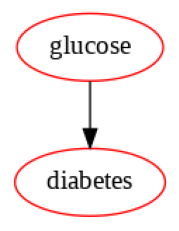

In [ ]:
ft_index=0

ind_chosen_parent_features=np.array([ft_index])
bayes_net=construct_and_train_bayes_net(X_train_binned, y_train, ind_chosen_parent_features)

# visualize
bayes_net.plot()

train_acc,test_acc=get_performance(bayes_net, X_train_binned, y_train, X_test_binned, y_test, ind_chosen_parent_features)
print(FEATURE_NAMES[ft_index])
print("train acc %.2f" %train_acc)
print("test acc %.2f" %test_acc)


ft_index=1

ind_chosen_parent_features=np.array([ft_index])
bayes_net=construct_and_train_bayes_net(X_train_binned, y_train, ind_chosen_parent_features)

# visualize
bayes_net.plot()

train_acc,test_acc=get_performance(bayes_net, X_train_binned, y_train, X_test_binned, y_test, ind_chosen_parent_features)
print(FEATURE_NAMES[ft_index])
print("train acc %.2f" %train_acc)
print("test acc %.2f" %test_acc)


#### Comment on which feature seems more informative for predicting the presence of diabetes. (1 point)

Glucose levels seem more informative than the number of pregnancies given the corresponding bayes net has higher training and test accuracy. 

#### Exercise 2c: Construct a Bayes net with parent and children nodes (3 points)

#### Here, we'll implement a Bayes net with similar structure to one laid out in this [paper](This Bayes net structure is based on https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6470852).

#### Construct and train a Bayes net in which:
#### -the following features are all parents of the diabetes feature node (pregnancies, skin, bmi, pedigree, age).  
#### -the following features are all children of the diabetes feature node (glucose, bp, insulin)
#### Use construct_and_train_bayes_net by passing in the binned training dataset and specifying the indices of the parent feature nodes and indices of the children feature nodes.

#### Report the training and test accuracy of the Bayes Net using get_performance by passing in the trained bayes net, binned datasets, and indices of the parent and children feature nodes.

train acc 0.81
test acc 0.70


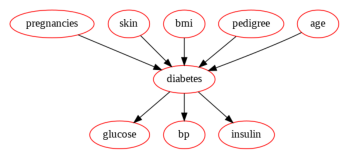

In [ ]:
ind_chosen_parent_features=np.array([0,3,5,6,7])
ind_chosen_children_features=np.array([1,2,4])
bayes_net=construct_and_train_bayes_net(X_train_binned, y_train, ind_chosen_parent_features, ind_chosen_children_features)

# visualize
bayes_net.plot()

train_acc,test_acc=get_performance(bayes_net, X_train_binned, y_train, X_test_binned, y_test, 
                                   ind_chosen_parent_features,
                                  ind_chosen_children_features)
print("train acc %.2f" %train_acc)
print("test acc %.2f" %test_acc)

#### Compare the performance of this Bayes net against the Bayes nets from Ex. 2b. (1 point)

The Bayes net from Ex. 2c attains higher training accuracy than the Bayes nets from Ex. 2b, given that this model incorporates more information. 

Its test accuracy is lower than the Bayes net with only glucose as the parent of diabetes (no children nodes), most likely due to the overfitting. 

Its test accuracy is higher than the Bayes net with only pregnancy as the parent of diabetes (no children nodes), most likely because the model incorporates more relevant features like glucose.